# The Sparks Foundation


# Data Science and Business Analytics (GRIP June21)

# Task 1: Prediction using Supervised ML

# Author : Katamneni Kiran Kumar

**Statement: What will be the predicted score if the student studied for 9.25hrs/day?**

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data has been imported successfully")

Data has been imported successfully


In [3]:
#print first 5 rows
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#shape of data
data.shape

(25, 2)

In [5]:
#data types
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
#statistical infomation about the data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
#info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
#check missing data
data.isna().sum()

Hours     0
Scores    0
dtype: int64

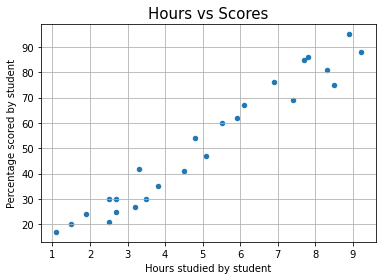

In [9]:
#visualization
data.plot(x='Hours',y='Scores',kind='scatter')
plt.title('Hours vs Scores',size = 15)
plt.xlabel('Hours studied by student',size=10)
plt.ylabel('Percentage scored by student',size=10)
plt.grid(True)

In [10]:
#divide the data into attributes and labels
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [11]:
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [12]:
#training model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [13]:
#fit the data to model
lm.fit(X_train,y_train)

LinearRegression()

In [14]:
#find intercept and coefficient of model
print(f'Intercept: {lm.intercept_}')
print(f'Coefficient: {lm.coef_}')

Intercept: 2.018160041434683
Coefficient: [9.91065648]


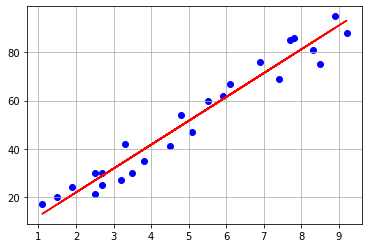

In [15]:
#plot the regression line
line = lm.intercept_+lm.coef_*X
plt.scatter(X,y,color = 'blue')
plt.plot(X,line,color = 'red')
plt.grid(True)

In [16]:
#predictions using X_test
y_pred = lm.predict(X_test)

In [17]:
prediction = pd.DataFrame({'Actual value':y_test,'Predcited value':y_pred})

In [18]:
prediction

,Actual value,Predcited value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


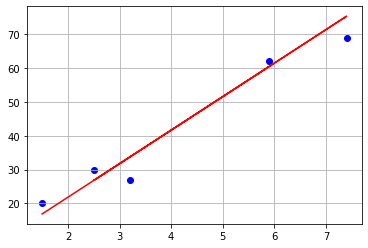

In [19]:
#Actual vs Predicted
plt.scatter(X_test,y_test,color = 'blue')
plt.plot(X_test,y_pred,color = 'red')
plt.grid(True)

In [20]:
#prediction
hrs = 9.25
print(f'Predicted score for a student if he study {hrs}hrs/day is {lm.predict([[hrs]])}')

Predicted score for a student if he study 9.25hrs/day is [93.69173249]


In [21]:
#evaluation of model
from sklearn import metrics

In [22]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}')
print(f'Root Mean squared Error: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'Maximum Error: {metrics.max_error(y_test,y_pred)}')

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean squared Error: 4.6474476121003665
Maximum Error: 6.732260779489842
